In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
orders_details = pd.read_csv(r"C:\Users\USER\Desktop\Tech_crush Data\pizza_sales\order_details.csv", encoding_errors='ignore')
orders = pd.read_csv(r"C:\Users\USER\Desktop\Tech_crush Data\pizza_sales\orders.csv", encoding_errors='ignore')
pizzas = pd.read_csv(r"C:\Users\USER\Desktop\Tech_crush Data\pizza_sales\pizzas.csv", encoding_errors='ignore')
pizza_types = pd.read_csv(r"C:\Users\USER\Desktop\Tech_crush Data\pizza_sales\pizza_types.csv", encoding_errors='ignore')


In [3]:
# Check basic info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [4]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [6]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [7]:
#Merging the order table and order_details table
order_table = pd.merge(orders, orders_details, how='inner', on='order_id')
order_table

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1


In [8]:
## joining the pizza table and pizza details table
pizza_table = pd.merge(pizzas, pizza_types, how='inner', on='pizza_type_id')
pizza_table

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [9]:
## Joining the order table and pizza table together
full_data = pd.merge(order_table, pizza_table, how='inner', on='pizza_id')
full_data

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## 1.	What is the total revenue/sales?

In [10]:
# Creating a column for sales data
full_data['sales']= full_data['price'] * full_data['quantity']

In [11]:
Total_sales= full_data['sales'].sum()
print(f'The total sales is: {Total_sales}')

The total sales is: 817860.05


## 2.	Find the total quantity sold.

In [12]:
Total_quantity= full_data['quantity'].sum()
print(f'The total quantity is: {Total_quantity}')

The total quantity is: 49574


## 3.	Find the total orders.

In [13]:
Total_orders= full_data['order_id'].count()
print(f'The total order made is: {Total_orders}')

The total order made is: 48620


## 4.	How many pizza types do they sell?

In [14]:
No_of_pizza_types=full_data['name'].nunique()
print(f'There are {No_of_pizza_types} pizza types')

There are 32 pizza types


In [15]:
No_of_pizza_category=full_data['category'].nunique()
print(f'There are {No_of_pizza_category} pizza category')

There are 4 pizza category


## 5.	Find the average price of the pizzas.

In [16]:
Average_pizzza_price= full_data['price'].drop_duplicates().mean()
print(f'The average pizza price is {Average_pizzza_price}')

The average pizza price is 17.022000000000002


## 6.	What are the peak hours of sales?

In [18]:
full_data['hour'] = pd.to_datetime(full_data['time']).dt.hour
peak_hours_sales = full_data.groupby('hour')['sales'].sum().sort_values(ascending=False).reset_index()
peak_hours_sales

C:\Users\USER\AppData\Local\Temp\ipykernel_11036\4244421757.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_data['hour'] = pd.to_datetime(full_data['time']).dt.hour


,hour,sales
0,12,111877.90
1,13,106065.70
2,18,89296.85
3,17,86237.45
4,19,72628.90
5,16,70055.40
6,14,59201.40
7,20,58215.40
8,15,52992.30
9,11,44935.80


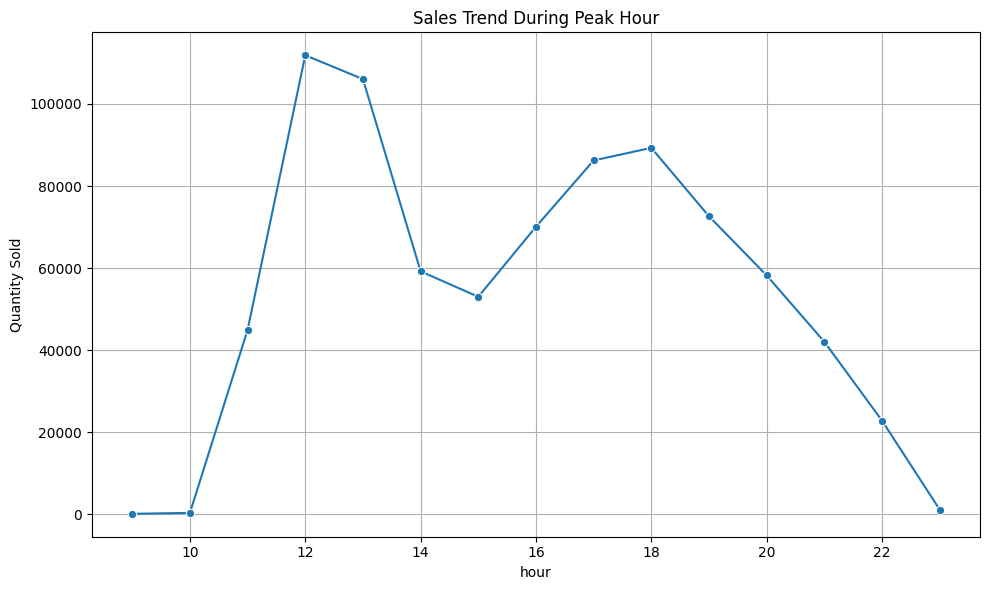

In [25]:
#plotting the houly trend for sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=peak_hours_sales, x='hour', y='sales', marker= 'o')
plt.title("Sales Trend During Peak Hour")
plt.xlabel("hour")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

## 7.	Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [23]:
full_data['Day'] = pd.to_datetime(full_data['date']).dt.day_name()
sales_per_day =full_data.groupby('Day')['sales'].sum().sort_values(ascending=False).reset_index()
sales_per_day

,Day,sales
0,Friday,136073.90
1,Thursday,123528.50
2,Saturday,123182.40
3,Wednesday,114408.40
4,Tuesday,114133.80
5,Monday,107329.55
6,Sunday,99203.50


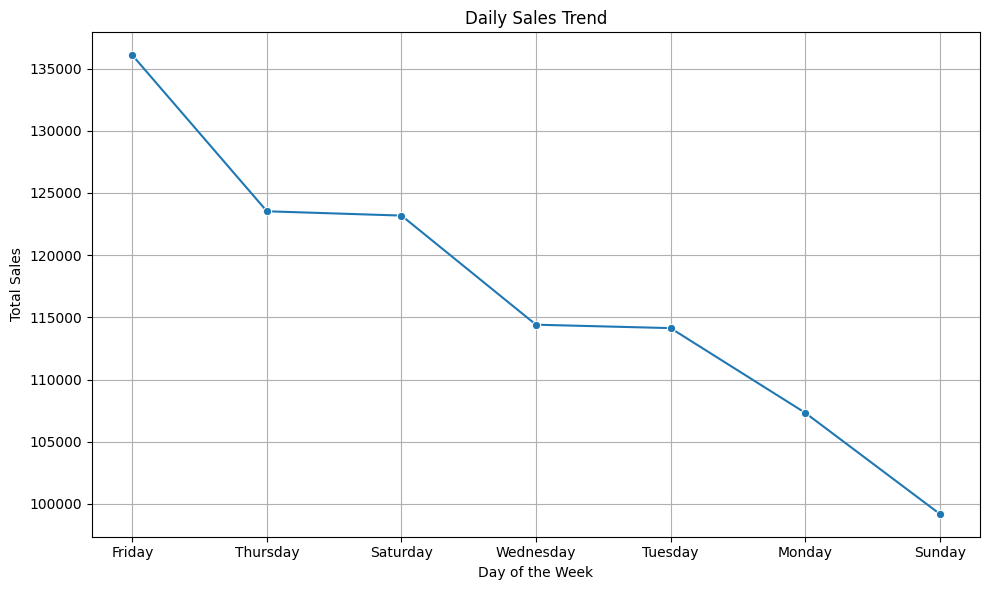

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_day, x='Day', y='sales', marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

## 8.	Find the top 5 bestselling pizzas.

### By pizza_name

In [38]:
pizza_names_performance_stats=full_data.groupby('name').agg(
    orders=('order_id', 'count'), 
    quantity=('quantity', 'sum'), 
    sales= ('sales', 'sum')).reset_index()
pizza_names_performance_stats
Top_5_best_selling_pizza= pizza_names_performance_stats.sort_values(by= ['orders', 'quantity'], ascending = False).head()
Top_5_best_selling_pizza

,name,orders,quantity,sales
7,The Classic Deluxe Pizza,2416,2453,38180.50
0,The Barbecue Chicken Pizza,2372,2432,42768.00
12,The Hawaiian Pizza,2370,2422,32273.25
20,The Pepperoni Pizza,2369,2418,30161.75
30,The Thai Chicken Pizza,2315,2371,43434.25


### By pizza_category

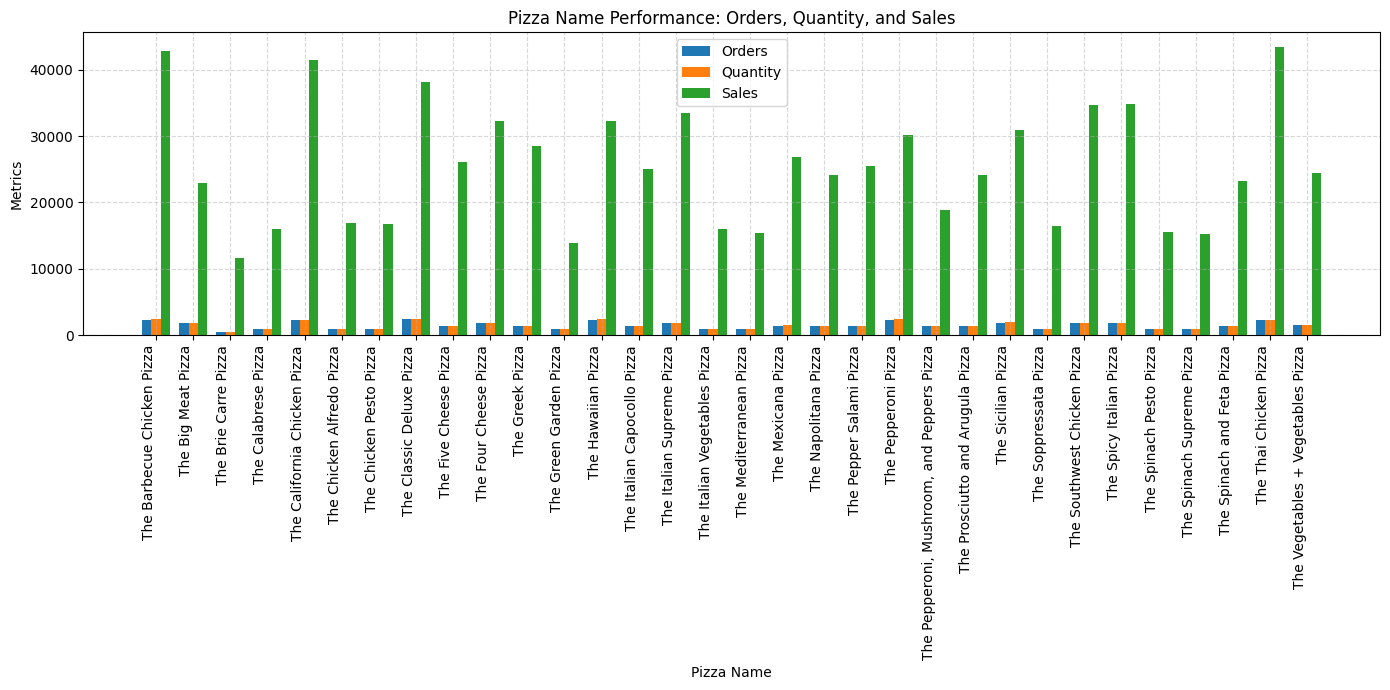

In [46]:
plt.figure(figsize=(14, 7))

# Get number of pizza types
names = pizza_names_performance_stats['name']
x = np.arange(len(names))  # label locations

# Bar widths and offsets
width = 0.25

# Plotting bars
plt.bar(x - width, pizza_names_performance_stats['orders'], width=width, label='Orders')
plt.bar(x, pizza_names_performance_stats['quantity'], width=width, label='Quantity')
plt.bar(x + width, pizza_names_performance_stats['sales'], width=width, label='Sales')

# Labeling
plt.xlabel('Pizza Name')
plt.ylabel('Metrics')
plt.title('Pizza Name Performance: Orders, Quantity, and Sales')
plt.xticks(ticks=x, labels=names, rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

In [39]:
pizza_category_performance_stats=full_data.groupby('category').agg(
    orders=('order_id', 'count'), 
    quantity=('quantity', 'sum'), 
    sales= ('sales', 'sum')).reset_index()
pizza_category_performance_stats
Top_5_best_selling_category= pizza_category_performance_stats.sort_values(by= ['orders', 'quantity'], ascending = False).head()
Top_5_best_selling_category

,category,orders,quantity,sales
1,Classic,14579,14888,220053.10
2,Supreme,11777,11987,208197.00
3,Veggie,11449,11649,193690.45
0,Chicken,10815,11050,195919.50


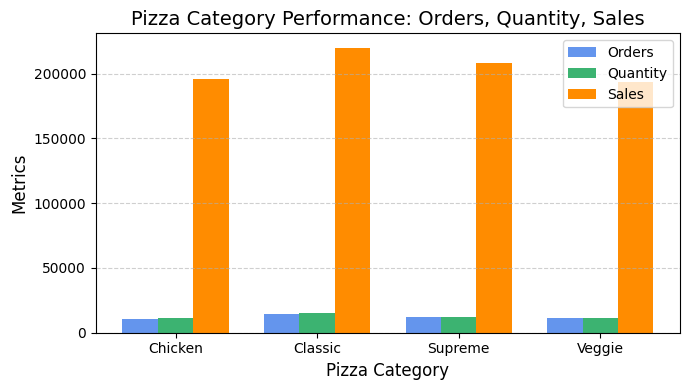

In [51]:
categories= pizza_category_performance_stats['category']
x = np.arange(len(categories))
width = 0.25  # Width of each bar

# Plotting
plt.figure(figsize=(7, 4))

plt.bar(x - width, pizza_category_performance_stats['orders'], width, label='Orders', color='cornflowerblue')
plt.bar(x, pizza_category_performance_stats['quantity'], width, label='Quantity', color='mediumseagreen')
plt.bar(x + width, pizza_category_performance_stats['sales'], width, label='Sales', color='darkorange')

# Labels and formatting
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Pizza Category Performance: Orders, Quantity, Sales', fontsize=14)
plt.xticks(ticks=x, labels=categories, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

## 9.	Find the sales made in each month. Any trend noticeable?

In [52]:
full_data['month'] = pd.to_datetime(full_data['date']).dt.month_name()
sales_per_month =full_data.groupby('month')['sales'].sum().sort_values(ascending=False).reset_index()
sales_per_month

,month,sales
0,July,72557.90
1,May,71402.75
2,March,70397.10
3,November,70395.35
4,January,69793.30
5,April,68736.80
6,August,68278.25
7,June,68230.20
8,February,65159.60
9,December,64701.15


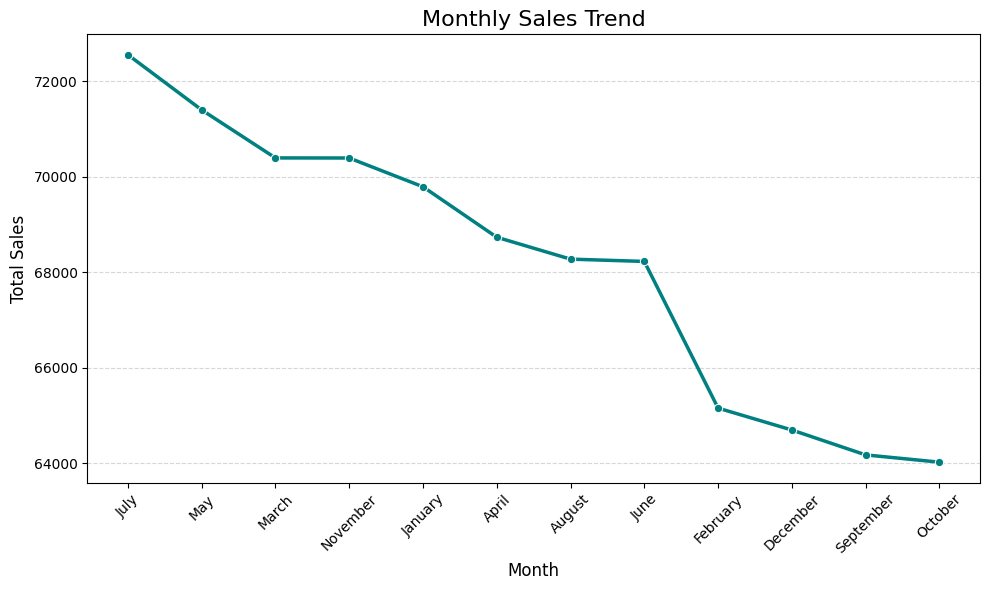

In [53]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_month, x='month', y='sales', marker='o', linewidth=2.5, color='teal')

# Add labels and title
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

## 10.	Are there pizza types that are not doing well on the menu?

In [58]:
pizza_names_performance_stats.tail()## Pizza not performing well in the menu

,name,orders,quantity,sales
27,The Spinach Pesto Pizza,957,970,15596.00
28,The Spinach Supreme Pizza,940,950,15277.75
29,The Spinach and Feta Pizza,1432,1446,23271.25
30,The Thai Chicken Pizza,2315,2371,43434.25
31,The Vegetables + Vegetables Pizza,1510,1526,24374.75
